In [1]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical 
%matplotlib inline

C:\Users\Varsha\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(trainX,trainY),(testX,testY) = mnist.load_data() 

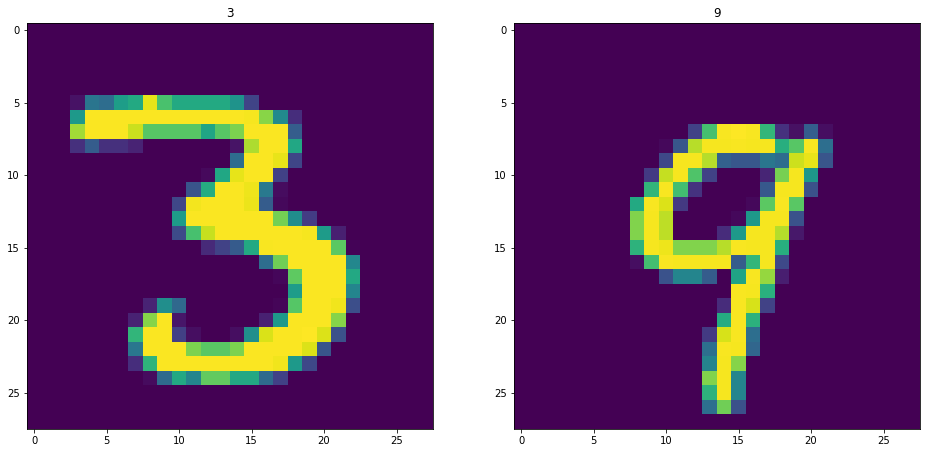

In [3]:
plt.figure(figsize=[16,16])
plt.subplot(121)
plt.imshow(trainX[12,:,:])
plt.title(trainY[12])
plt.subplot(122)
plt.imshow(testX[12,:,:]) 
plt.title(testY[12])
plt.show()

In [4]:
trainX = trainX.reshape(trainX.shape[0],28,28,1)
testX = testX.reshape(testX.shape[0],28,28,1) 

In [5]:
trainX = trainX.astype('float32')
testX = testX.astype('float32')
trainX = trainX/255
testX = testX/255

In [6]:
train_y_one_hot = to_categorical(trainY)
test_y_one_hot = to_categorical(testY)

In [7]:
from sklearn.model_selection import train_test_split
trainX,valid_X,train_label,valid_label = train_test_split(trainX, train_y_one_hot, test_size=0.2, random_state=13)

In [8]:
trainX.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [10]:
import keras
from keras.models import Sequential, Input , Model
from keras.layers import Dense,Dropout,Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Conv2D,MaxPooling2D


In [11]:
batch_size = 128 
epochs = 25 
num_classes = 10 
trainX[0].shape

(28, 28, 1)

In [24]:
train_model = Sequential() 
train_model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(28,28,1),padding='same'))
train_model.add(LeakyReLU(alpha=0.1))
train_model.add(MaxPooling2D((2,2),padding='same'))
train_model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
train_model.add(LeakyReLU(alpha=0.1))
train_model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
train_model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
train_model.add(LeakyReLU(alpha=0.1))
train_model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
train_model.add(Flatten())
train_model.add(Dense(128,activation='linear')) 
train_model.add(LeakyReLU(alpha=0.1))
train_model.add(Dense(num_classes,activation='softmax'))


In [25]:
train_model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy']) 

In [26]:
train_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        832       
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)        51264     
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4096)              0         
__________

In [14]:
train_digits = train_model.fit(trainX,train_label,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X,valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 761s 16ms/step - loss: 0.2066 - acc: 0.9358 - val_loss: 0.0756 - val_acc: 0.9768
Epoch 2/25
48000/48000 [==============================] - 573s 12ms/step - loss: 0.0524 - acc: 0.9836 - val_loss: 0.0493 - val_acc: 0.9847
Epoch 3/25
48000/48000 [==============================] - 448s 9ms/step - loss: 0.0390 - acc: 0.9874 - val_loss: 0.0386 - val_acc: 0.9889
Epoch 4/25
48000/48000 [==============================] - 279s 6ms/step - loss: 0.0260 - acc: 0.9918 - val_loss: 0.0316 - val_acc: 0.9902
Epoch 5/25
48000/48000 [==============================] - 225s 5ms/step - loss: 0.0208 - acc: 0.9930 - val_loss: 0.0354 - val_acc: 0.9898
Epoch 6/25
48000/48000 [==============================] - 152s 3ms/step - loss: 0.0163 - acc: 0.9948 - val_loss: 0.0396 - val_acc: 0.9880
Epoch 7/25
48000/48000 [==============================] - 151s 3ms/step - loss: 0.0135 - acc: 0.9956 - val_loss: 0.0385 

In [17]:
model_json = train_model.to_json()
with open("mnist.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
train_model.save_weights("mnist_weight.h5")

In [18]:
test_results = train_model.evaluate(testX,test_y_one_hot)

10000/10000 [==============================] - 13s 1ms/step


In [19]:
test_results[1],test_results[0] 

(0.9906, 0.044176817938306974)

In [9]:
from keras.models import model_from_json
json_file = open('mnist.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("mnist_weight.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(testX, test_y_one_hot, verbose=0)

Loaded model from disk


In [10]:
score


[0.00852380002623354, 0.9981099966049194]

In [12]:
import matplotlib.pyplot as plt
import cv2
img = cv2.imread("1.jpg") 
img = cv2.cvtColor( img, cv2.COLOR_RGB2GRAY ) 
resized = cv2.resize(img, (28,28), interpolation = cv2.INTER_AREA)
resized = cv2.bitwise_not(resized) 
resized = resized/255

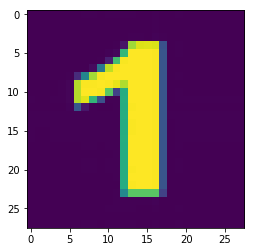

In [13]:
plt.imshow(resized)

In [14]:
import numpy as np
resized = resized.reshape(28,28,1)
resized  = np.expand_dims(resized,axis=0)

In [15]:
resn = loaded_model.predict_classes(resized)

In [16]:
resn

array([1], dtype=int64)